In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedata=pd.read_csv(mouse_drug_data_to_load)

# Combine the data into a single dataset
clinicaldata=pd.read_csv(clinical_trial_data_to_load)

# Display the data table for preview

mousedata.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
mergedata=pd.merge(clinicaldata,mousedata,how="left", on=["Mouse ID"])
mergedata.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
groupdata=mergedata.groupby(["Drug","Timepoint"])

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumormean=groupdata["Tumor Volume (mm3)"].mean()
#tumormean

# Convert to DataFrame
tumormean_df=pd.DataFrame(tumormean)
#tumormean_df

tumormean_df=tumormean_df.reset_index()
tumormean_df.head()


# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
 
tumor_sm=groupdata["Tumor Volume (mm3)"].sem()
#tumormean

# Convert to DataFrame
tumor_sm_df=pd.DataFrame(tumor_sm)
#tumormean_df

tumor_sm_df=tumor_sm_df.reset_index()
tumor_sm_df.head()


# Convert to DataFrame
tumor_sm_df=pd.DataFrame(tumor_sm_df)

# Preview DataFrame

tumor_sm_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames

tumorvls_mean = tumormean_df.reset_index()

tumorvls_pivot_mean = tumorvls_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumorvls_sem = tumor_sm_df.reset_index()
tumorvls_pivot_sem = tumorvls_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#Preview that Reformatting worked
tumorvls_pivot_mean.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


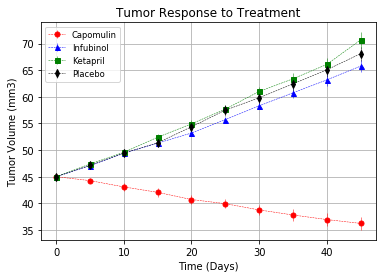

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumorvls_pivot_mean.index, tumorvls_pivot_mean["Capomulin"], yerr=tumorvls_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(tumorvls_pivot_mean.index, tumorvls_pivot_mean["Infubinol"], yerr=tumorvls_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(tumorvls_pivot_mean.index, tumorvls_pivot_mean["Ketapril"], yerr=tumorvls_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(tumorvls_pivot_mean.index, tumorvls_pivot_mean["Placebo"], yerr=tumorvls_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("..\images\Fig1.png")



In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metsite_mean=mergedata.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
metsite_mean_df=pd.DataFrame({"Metastatic Sites":metsite_mean})


# Preview DataFrame  
metsite_mean_df.head()
                 

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metsite_sem=mergedata.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()


# Convert to DataFrame


metsite_sem_df=pd.DataFrame({"Metastatic Sites":metsite_sem})



# Preview DataFrame
metsite_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [12]:
# Minor Data Munging to Re-Format the Data Frames

metsite_mean = metsite_mean_df.reset_index()
metsite_mean_pivot= metsite_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
metsite_sem = metsite_sem_df.reset_index()
metsite_sem_pivot = metsite_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
#Preview that Reformatting worked
metsite_sem_pivot.head()
metsite_mean_pivot.head()



# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


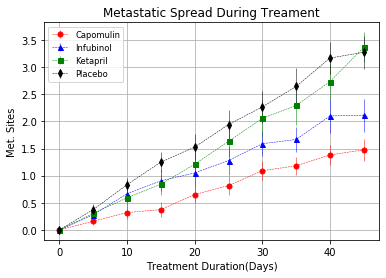

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(metsite_mean_pivot.index, metsite_mean_pivot["Capomulin"], yerr=metsite_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.errorbar(metsite_mean_pivot.index, metsite_mean_pivot["Infubinol"], yerr=metsite_sem_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(metsite_mean_pivot.index, metsite_mean_pivot["Ketapril"], yerr=metsite_sem_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(metsite_mean_pivot.index, metsite_mean_pivot["Placebo"], yerr=metsite_sem_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
plt.title("Metastatic Spread During Treament")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration(Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("..\images\Spread1.png")

# Save the Figure

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=mergedata.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df=pd.DataFrame({"Mouse Count":mouse_count})

# Preview DataFrame
mouse_count_df.reset_index().head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count= mouse_count_df.reset_index()
mouse_count_pivot= mouse_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]
#Preview that Reformatting worked
mouse_count_pivot.head()


# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


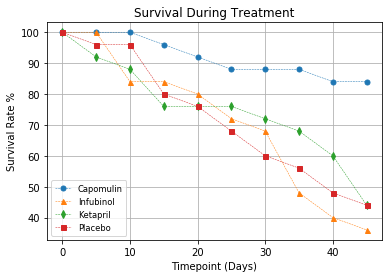

In [16]:
# Generate the Plot (Accounting for percentages)
#list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','x','d','^']
colors=['green','red','black','blue']
mouse_count_timepoint=mouse_count_pivot.index
#i=0
#for drug in list:
#plt.plot(mouse_count_timepoint, (mouse_count_pivot[drug]/mouse_count_pivot[drug].max()*100), marker=markers[i], linestyle='--', color=colors[i])
#i+=1
plt.plot(mouse_count_timepoint, (mouse_count_pivot["Capomulin"]/mouse_count_pivot["Capomulin"].max()*100), marker="o", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(mouse_count_timepoint, (mouse_count_pivot["Infubinol"]/mouse_count_pivot["Infubinol"].max()*100), marker="^", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.plot(mouse_count_timepoint, (mouse_count_pivot["Ketapril"]/mouse_count_pivot["Ketapril"].max()*100), marker="d", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.plot(mouse_count_timepoint, (mouse_count_pivot["Placebo"]/mouse_count_pivot["Placebo"].max()*100), marker="s", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")
  
plt.grid()
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.title("Survival During Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate %")

# Save the Figure
plt.savefig('..\Images\Survival1.png')

# Show the Figure
plt.show()





![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

tumor_pct_chg=100 * (tumorvls_pivot_mean.iloc[-1]-tumorvls_pivot_mean.iloc[0])/tumorvls_pivot_mean.iloc[0]
tumor_pct_chg_sem=(tumorvls_pivot_sem.iloc[-1]-tumorvls_pivot_sem.iloc[0])* 100/tumorvls_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_chg


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

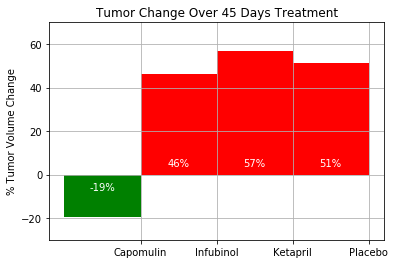

In [18]:
# Store all Relevant Percent Changes into a Tuple

Pchanges=(tumor_pct_chg['Capomulin'],
tumor_pct_chg['Infubinol'],
tumor_pct_chg['Ketapril'],
tumor_pct_chg['Placebo'])

# Splice the data between passing and failing drugs
summary_bar = plt.subplot()
x_axis = np.arange(len(Pchanges))
width=1
rectsPass=summary_bar.bar(x_axis[0], Pchanges[0], width, color='Green' )
rectsFail=summary_bar.bar(x_axis[1:], Pchanges[1:], width, color='Red' )

# Orient widths. Add labels, tick marks, etc. 

summary_bar.set_title("Tumor Change Over 45 Days Treatment")
summary_bar.set_ylabel("% Tumor Volume Change")
summary_bar.set_xticks(x_axis + 0.5)
summary_bar.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
summary_bar.set_autoscaley_on(False)
summary_bar.set_ylim([-30,70])
summary_bar.grid(True)


# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height=rect.get_height()
        summary_bar.text(rect.get_x()+rect.get_width()/2., 3,
                         '%d%%' % int(height),
                         ha='center', va='bottom', color='white')
        
def autolabelPass(rects):
    for rect in rects:
        height=rect.get_height()
        summary_bar.text(rect.get_x()+rect.get_width()/2., -8,
                         '%d%%' % int(height),
                         ha='center', va='bottom', color='white')

# Call functions to implement the function calls

autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig('../Images/change.png')

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/change.png)